# ANALYSIS AND INSIGHTS

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa


%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## DATA LOAD

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50,01_Una,0-3,1,48-744,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0,01_Una,0-3,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39,03_Tres,5-16,3-24,1-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68,01_Una,0-3,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4,01_Una,0-3,1,48-744,50,142975.0,3.200942


## ANALYSIS

### Analysis on pricing

**What is the average price? And the price range? And by district? And by neighborhood?**

**What is the ranking of districts and neighborhoods by average rental price?**

In [3]:
df.precio_total.describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: precio_total, dtype: float64

We see that there is at least one outlier at the top that skews the mean, so we will use the median as a more reliable measure of centralization.

In [4]:
df.precio_total.median()

70.0

In [5]:
df.groupby('distrito').precio_total.median().sort_values(ascending = False)

distrito
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: precio_total, dtype: float64

The San Blas data is very weird, let's see what's hapenning.

In [6]:
df.loc[df.distrito == 'San Blas - Canillejas'].sort_values('precio_total',ascending = False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,9800.0,100,03_Tres,5-16,3-24,1-4,90,163233.0,7.532233
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6300.0,75,02_Dos,4,2,1-4,70,126959.0,7.439364
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,04_Cuatro o mas,5-16,3-24,1-4,120,217644.0,8.212429
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5670.0,100,02_Dos,5-16,2,1-4,70,126959.0,8.391922
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4480.0,75,04_Cuatro o mas,5-16,3-24,1-4,150,272055.0,7.714952
9748,9748,9748,34882596,2 rooms near wanda,38951538,San Blas - Canillejas,Arcos,40.41948,-3.61427,Private room,1500,1,2,363,2 rooms near Wanda stadium (20' walking) with ...,f,4,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,02_Dos,4,3-24,1-4,70,126959.0,7.548577
9173,9173,9173,34522997,Beautiful Penthouse next to Wanda Metropolitano,260551569,San Blas - Canillejas,Canillejas,40.43686,-3.61093,Private room,2000,1,1,0,Wonderful penthouse in a lovely duplex next to...,f,4,1.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,100,01_Una,4,2,1-4,50,90685.0,8.138310
9831,9831,9831,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,1,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,03_Tres,5-16,2,1-4,90,163233.0,7.557076
10092,10092,10092,35091283,FINAL CHAMPIONS LEAGUE,264225539,San Blas - Canillejas,Rejas,40.44592,-3.58746,Private room,1000,1,1,180,"Desayuno, comida y cena incluida. Traslados al...",f,6,2.0,6.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,50,02_Dos,5-16,3-24,1-4,70,126959.0,10.334061
10404,10404,10404,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,1,365,None,f,1,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,02_Dos,0-3,3-24,1-4,70,126959.0,8.610212


The prices are around 3,000 - 5,000 euros

The descriptions mention the Champions League final...

**Insight 1: there may be properties with a regular residual value but with high value at specific times due to sporting events or shows**

Would it make sense to create a rental product that consists of renting in a "normal" way at a price below the market with the condition that the tenant vacates the apartment to rent it "for tourism" on certain dates?

The rest is as expected, with districts like Salamanca, Centro or Chanmartín ahead.

But for example median price difference between Retiro and Tetuán is very low, which implies we could compare the median price by district with the median purchase price also by district.

In [7]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
Arganzuela,58.0,142975.0
Barajas,49.5,119315.0
Carabanchel,48.0,74305.0
Centro,76.0,168945.0
Chamartín,74.0,178430.0
Chamberí,70.0,188335.0
Ciudad Lineal,50.0,102900.0
Fuencarral - El Pardo,60.0,124880.0
Hortaleza,69.0,135485.0


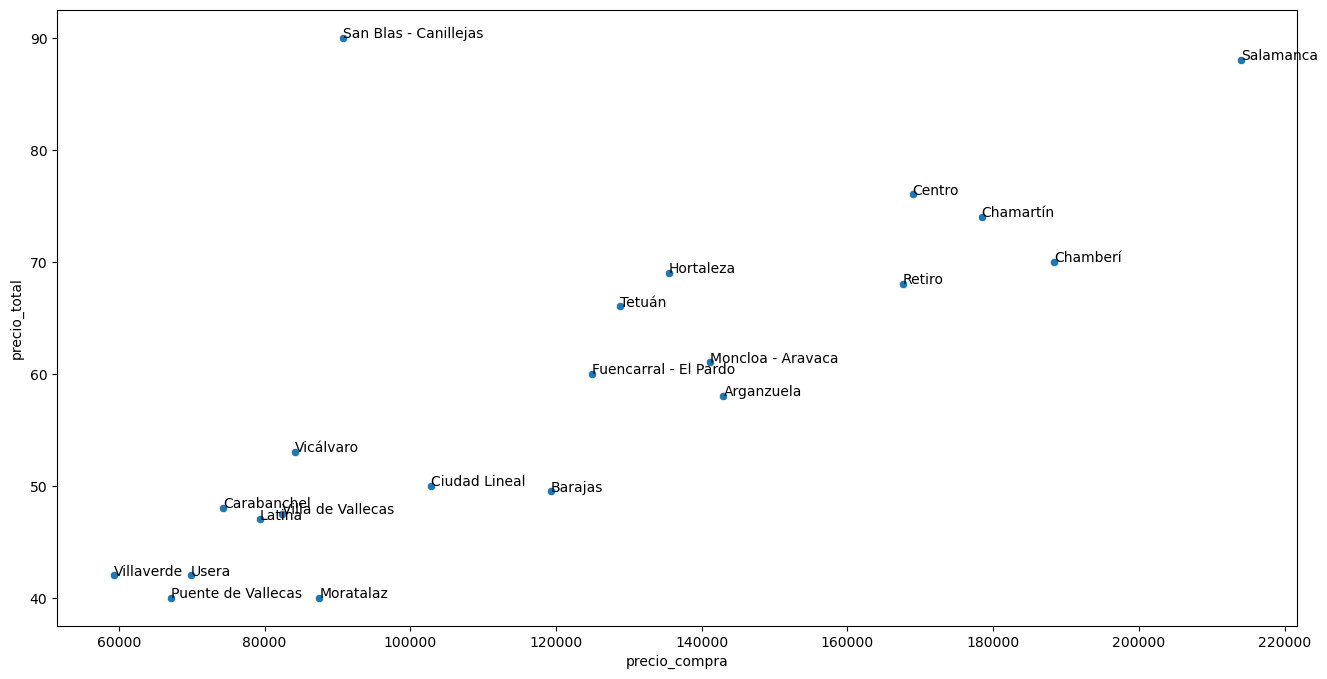

In [10]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

There is a clear correlation between the purchase price in each district and the price we can charge.

There are clearly three clusters: low-low, medium-medium and high-high.

And the exception here is San Blas, which we already know why.

Therefore, as expected, there is no clear "bargain" at this level.

Let's repeat the analysis at the neighborhood level.

In [12]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,35.5,74305.0
Acacias,53.8,142975.0
Adelfas,54.0,234612.0
Aeropuerto,41.3,119315.0
Aguilas,47.0,79345.0
...,...,...
Valverde,62.5,124880.0
Ventas,42.0,102900.0
Vinateros,50.0,87500.0


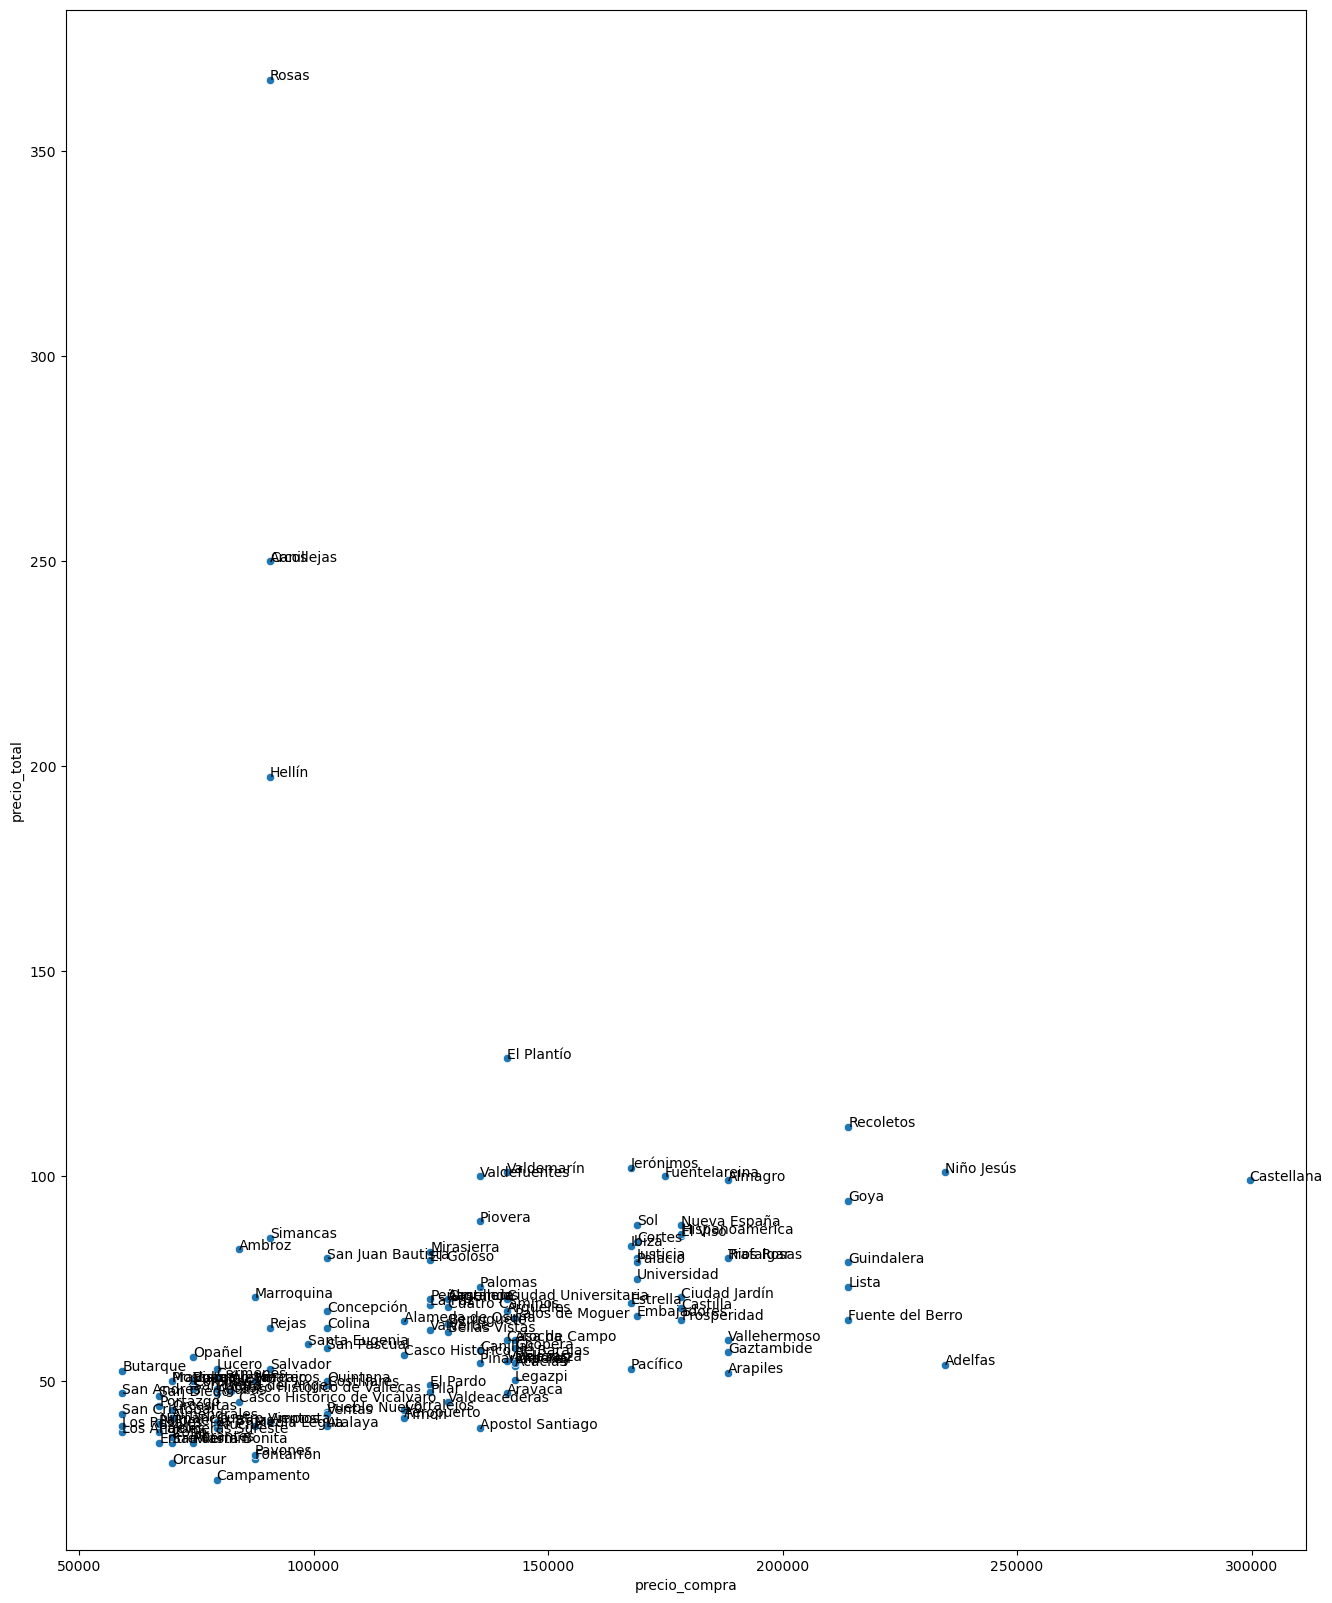

In [15]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

At this level we can see more things:

* 3 neighborhoods that stand out, possibly all 3 are from San Blas
* Within each low-medium-high group we can start to separate
* Low: Simancas, Ambroz, Marroquina, San Juan Bautista
* Medium: El Plantio, Valdemarín, Valdefuentes
* Medium-high: Jerónimos, Fuentela reina
* High: Recoletos

**Insight 2: There are certain neighborhoods that at first glance can maximize the cost-income ratio and we can also segment it by the type of quality of the property in which we are interested in investing**

In [16]:
df.loc[df.neighbourhood.isin(['Rosas','Canillejas','Hellin']),'distrito'].unique()

array(['San Blas - Canillejas'], dtype=object)

**What factors (apart from location) determine the rental price?**

we can build a minicube, since we have discretized our analysis variables.

In [17]:
#Step 1: Select which variables will be the metrics and which will be the dimensions
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,precio_total,precio_compra
0,01_Una,0-3,1,48-744,60.0,178430.0
1,01_Una,0-3,1,5-48,31.0,79345.0
2,03_Tres,5-16,3-24,1-4,50.0,257355.0
3,01_Una,0-3,1,5-48,92.0,168945.0
4,01_Una,0-3,1,48-744,26.0,142975.0
...,...,...,...,...,...,...
17705,01_Una,0-3,1,1-4,29.0,168945.0
17706,01_Una,0-3,1,1-4,29.0,168945.0
17707,01_Una,0-3,1,1-4,29.0,168945.0
17708,01_Una,0-3,1,1-4,29.0,213990.0


In [18]:
#Step 2: convert dimensions to transactional
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,60.0,178430.0,bedrooms_disc,01_Una
1,31.0,79345.0,bedrooms_disc,01_Una
2,50.0,257355.0,bedrooms_disc,03_Tres
3,92.0,168945.0,bedrooms_disc,01_Una
4,26.0,142975.0,bedrooms_disc,01_Una
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_disc,1-4
70836,29.0,168945.0,number_of_reviews_disc,1-4
70837,29.0,168945.0,number_of_reviews_disc,1-4
70838,29.0,213990.0,number_of_reviews_disc,1-4


In [19]:
#Step 3: Add the metrics by "variable" and "value" with the desired functions

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio


precio_total  precio_compra
variable               value                                       
accommodates_disc      0-3                      50.0       168945.0
                       4                        86.0       168945.0
                       5-16                    126.0       236523.0
bedrooms_disc          01_Una                   56.0       168945.0
                       02_Dos                  100.0       236523.0
                       03_Tres                 140.0       304101.0
                       04_Cuatro o mas         204.0       405468.0
beds_disc              1                        59.0       168945.0
                       2                       100.0       236523.0
                       3-24                    139.0       257355.0
number_of_reviews_disc 1-4                      70.0       168945.0
                       48-744                   68.0       168945.0
                       5-48                     69.0       168945.0

Now on the minicube, we analyze each variable

In [20]:
minicubo_precio.loc['bedrooms_disc']

,precio_total,precio_compra
value,,
01_Una,56.0,168945.0
02_Dos,100.0,236523.0
03_Tres,140.0,304101.0
04_Cuatro o mas,204.0,405468.0


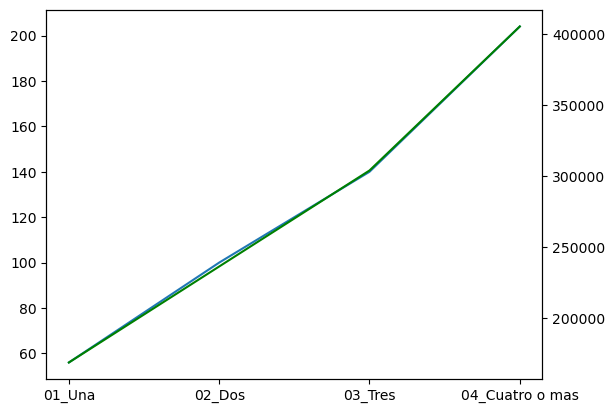

In [21]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

Nothing to highlight for the number of rooms.

There is an almost perfect relationship between the purchase price and the total price that can be charged.

Part of this effect may be artificial, since we use the number of rooms to calculate the total price as the purchase price.

In [22]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1,59.0,168945.0
2,100.0,236523.0
3-24,139.0,257355.0


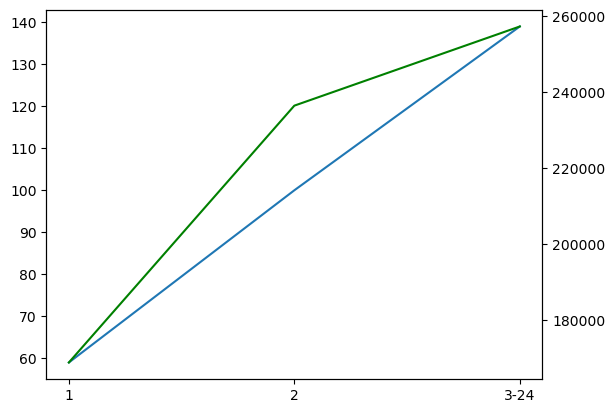

In [23]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

About the number of beds, there is one conclusion:

**Insight 3: the number of beds to avoid is 2**. Either we put one bed or we try to fit as many as possible.

Since there was no effect on the number of rooms, could it be that the owners are trying to fit many more beds than rooms to maximize income?

Let's look at this for example with one-bedroom apartments:

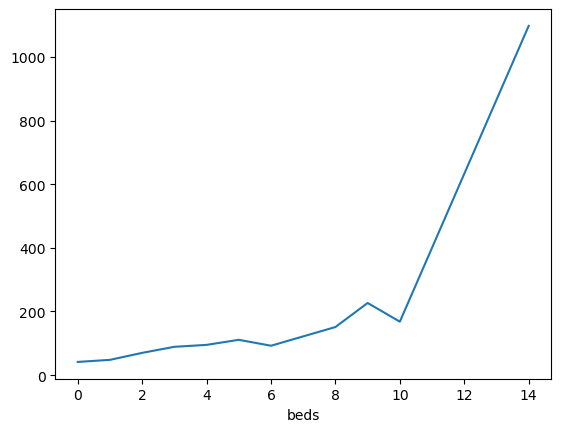

In [24]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

There's definetly something here, the graph shows that there is even people trying to squeeze tens of beds in a single room.


In [25]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
357,357,357,1044902,Masía el Ferrajón,5751753,Moncloa - Aravaca,Ciudad Universitaria,40.46549,-3.75115,Private room,112,2,1,0,<b>The space</b><br />Masía el Ferrajón featur...,f,16,1.0,14.0,0,NaN,NaN,NaN,4033,Moncloa - Aravaca,1097.6,100,01_Una,5-16,3-24,1-4,50,141155.0,6.767308
605,605,605,2143824,The Hat Madrid - 10 people shared,10940437,Centro,Sol,40.41511,-3.70804,Shared room,24,1,6,364,10 people shared room with shared bathroom. <b...,t,10,1.0,10.0,91,4.57,4.69,4.84,4827,Centro,168.0,0,01_Una,5-16,3-24,48-744,50,168945.0,0.436897
710,710,710,3011110,The Hat Madrid-Compartida 10 pers 2,10940437,Centro,Embajadores,40.41311,-3.70621,Shared room,24,1,6,364,The Hat Madrid es el primer Boutique Hostel de...,t,10,1.0,10.0,28,4.56,4.81,4.93,4827,Centro,168.0,0,01_Una,5-16,3-24,5-48,50,168945.0,0.470155
11848,11848,11848,39600798,Bed in a 10-Bed Dormitory In the Centre of Madrid,304035848,Centro,Justicia,40.42710,-3.69912,Shared room,20,1,13,351,"Low-key, hostel-style setup on a tree-lined st...",f,1,1.0,10.0,2,5.00,5.00,5.00,4827,Centro,140.0,3,01_Una,0-3,3-24,1-4,50,168945.0,1.207701
13340,13340,13340,42492960,Apartamento dúplex 10camas en literas,338384437,Tetuán,Cuatro Caminos,40.44959,-3.70138,Private room,298,1,1,364,Vivienda en planta baja con 10 plazas distribu...,f,10,1.0,10.0,1,5.00,4.00,5.00,3678,Tetuán,2086.0,0,01_Una,5-16,3-24,1-4,50,128730.0,3.658902
15722,15722,15722,48855617,"habitaciones en una casa tranquila, en el centro",194738186,Salamanca,Fuente del Berro,40.42604,-3.66373,Private room,36,2,1,359,Es una casa que tiene dos habitaciones que se ...,f,5,1.0,9.0,0,NaN,NaN,NaN,6114,Salamanca,226.8,1,01_Una,5-16,3-24,1-4,50,213990.0,3.510206


Let's now look at the number of guests they accept.


In [26]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0-3,50.0,168945.0
4,86.0,168945.0
5-16,126.0,236523.0


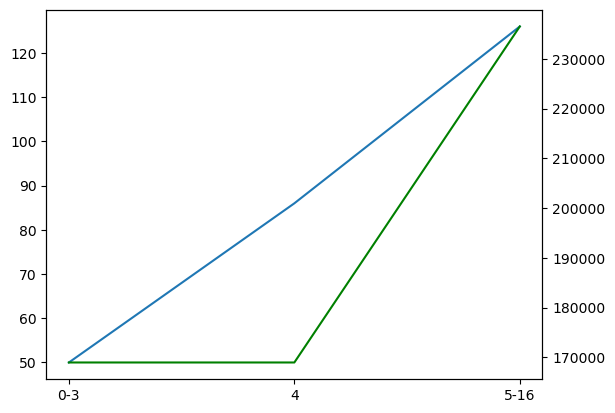

In [27]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

**Insight 4: The optimal number of guests is 3, since the price of the properties to accommodate 3 is the same as to accommodate 1 or 2. From 4 onwards the apartment needs to be larger and the purchase price increases considerably**

Finally, we are going to analyse the variable we have constructed for proximity to a point of interest to see if it has an effect on the price of the rooms.

In a real situation we would have constructed many of this type, and repeated the analysis with all of them.

In this case, since we have constructed the distance to Puerta del Sol, we are going to evaluate only the districts for which this may be relevant, that is, the most central ones.

To do this, we are first going to calculate the average distance per district and choose a cut-off point.

In [28]:
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_sol, dtype: float64

In [29]:
df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

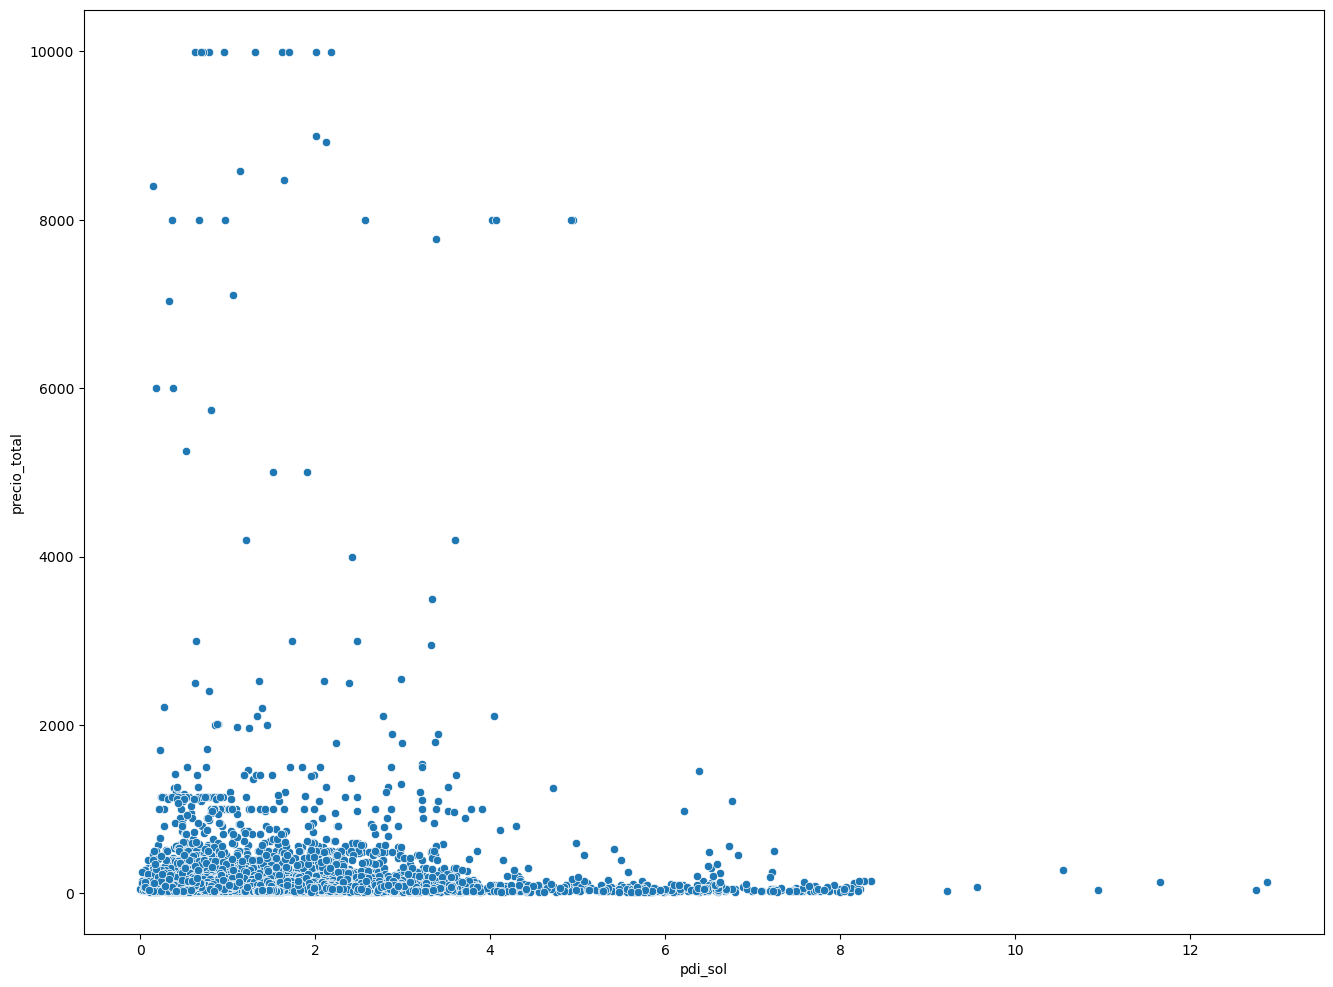

In [30]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

There doesn't seem to be as direct a relationship as one might expect between the distance to Puerta del Sol and the rental price.

**Insight 5: Being within the district, it seems that proximity to points of interest does not have as much impact as would be expected. This opens the door to looking for properties that, while in a central district, are not right next to the POI and therefore, hopefully, have a lower purchase price**

### Geographic analysis on a map

Ok now let's have some fun. Geographic analysis is very deep itself, but we're going to use a simple Python alternative to play with


In [2]:
import folium

In [3]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

Let's see the San Blas district.

In [33]:
datos = df[df.distrito == 'San Blas - Canillejas'].copy()

In [34]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.Marker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
   ).add_to(mapa)

mapa

Let's try to make it more visual

In [35]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [36]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

**Insight 6: There are still many yellow and orange dots, which may indicate that there is still potential to further exploit the sporting event factor**